In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn import metrics

# Making a list of missing value types

In [4]:
missing_values = ["n/a", "?", "na", "--"]
df = pd.read_csv('C:/Users/Md Monir/Documents/Jupyter Lab/DataSets/heart diseases.csv',na_values = missing_values)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:
df['num'].replace({
    2: 1,
    3: 1,
    4: 1
}, inplace=True)

In [6]:
df.shape

(303, 14)

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [8]:
df['num'].value_counts()

0    164
1    139
Name: num, dtype: int64

# Rename a column

In [9]:
df = df.rename(columns={'num': 'heartdisease'})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [10]:
df['heartdisease'].values

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [11]:
# 'nan' is a misiing value
print(df.thal.values)

[ 6.  3.  7.  3.  3.  3.  3.  3.  7.  7.  6.  3.  6.  7.  7.  3.  7.  3.
  3.  3.  3.  3.  3.  7.  7.  3.  3.  3.  3.  7.  3.  7.  3.  7.  3.  3.
  7.  6.  7.  3.  7.  7.  3.  3.  3.  7.  3.  7.  3.  3.  3.  7.  3.  3.
  7.  7.  7.  7.  3.  3.  7.  3.  7.  3.  7.  7.  3.  7.  7.  3.  3.  7.
  7.  6.  3.  3.  7.  3.  3.  7.  3.  3.  3.  7.  3.  3.  3. nan  3.  3.
  3.  7.  7.  3.  3.  7.  7.  7.  3.  3.  3.  3.  3.  3.  7.  7.  7.  7.
  7.  7.  7.  3.  6.  7.  7.  6.  3.  3.  7.  7.  7.  7.  3.  7.  3.  3.
  7.  7.  3.  3.  7.  7.  3.  3.  3.  3.  7.  7.  7.  3.  3.  7.  3.  7.
  7.  3.  7.  3.  3.  3.  7.  3.  7.  7.  3.  3.  7.  7.  7.  7.  7.  3.
  3.  3.  3.  7.  3.  3.  7.  3.  7.  7.  3.  3.  6.  7.  7.  6.  3.  3.
  7.  7.  3.  7.  3.  3.  7.  6.  7.  7.  3.  7.  7.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  7.  7.  7.  7.  7.  7.  3.  3.  3.  7.  3.  7.  3.  7.
  3.  3.  3.  3.  3.  3.  3.  7.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  7.  7.  3.  3.  3.  3.  3.  3.  3.  3.  7

# null values maintain

In [12]:
df.isnull().sum()   # or df.isnull().any()

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              4
thal            2
heartdisease    0
dtype: int64

In [13]:
# ca: number of major vessels (0-3) colored by flourosopy
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
import math
ca_null_value = math.ceil(df.ca.mean())
ca_null_value

1

In [14]:
thal_null_value = math.ceil(df.thal.mean())
thal_null_value

5

In [15]:
df.ca.fillna(ca_null_value, inplace = True)
df.thal.fillna(thal_null_value, inplace = True)

In [16]:
df.isnull().sum() 

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
thal            0
heartdisease    0
dtype: int64

# Specify the target variable and predictor variables

In [17]:
# predictor variables
x = df.drop(['heartdisease'], axis =1 ) 
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [18]:
# target variable
y = df['heartdisease'] 
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: heartdisease, Length: 303, dtype: int64

In [19]:
# distribution of class labels or categories
print(pd.value_counts(y))

0    164
1    139
Name: heartdisease, dtype: int64


# Split dataset into training and test data

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, random_state=7)

In [21]:
# shape of the training data
print("\nShape of training data(xtrain) : ",xtrain.shape)
print("\nShape of training data(ytrain) : ",ytrain.shape)


Shape of training data(xtrain) :  (242, 13)

Shape of training data(ytrain) :  (242,)


In [22]:
# class distribution of the training data
print(pd.value_counts(ytrain))

0    135
1    107
Name: heartdisease, dtype: int64


In [23]:
# shape of the testing data
print("\nShape of testing data(xtest) : ",xtest.shape)
print("\nShape of testing data(ytest) : ",ytest.shape)


Shape of testing data(xtest) :  (61, 13)

Shape of testing data(ytest) :  (61,)


# Balanced split of the dataset

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.4, random_state=7, stratify=y)

# Feature Scaling

In [25]:
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#xtrain = sc_X.fit_transform(xtrain)
#xtest = sc_X.transform(xtest)

# AdaBoost Classifier

In [31]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(xtrain, ytrain)
#Predict the response for test dataset
ypred = model.predict(xtest)

In [32]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest, ypred))

Accuracy: 0.8032786885245902


# Random Forest Classifier model

In [50]:
# ML Algroithm
from sklearn.ensemble import RandomForestClassifier
Rclf = RandomForestClassifier()
Rclf.fit(xtrain, ytrain)

RandomForestClassifier()

In [51]:
# make predictions on training data
predictions_train = Rclf.predict(xtrain)
print('\nTraining Accuracy :', accuracy_score(ytrain,predictions_train))
# make predictions on test data
predictions_test = Rclf.predict(xtest)
print('\nTest Accuracy :', accuracy_score(ytest, predictions_test))


Training Accuracy : 1.0

Test Accuracy : 0.8278688524590164


# Performance of Random Forest Classifier

In [52]:
confusion_matrix(ytest, predictions_test)

array([[55, 11],
       [10, 46]], dtype=int64)

In [53]:
print(classification_report(ytest, predictions_test))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        66
           1       0.81      0.82      0.81        56

    accuracy                           0.83       122
   macro avg       0.83      0.83      0.83       122
weighted avg       0.83      0.83      0.83       122



# Naive Bayes Model

In [54]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nbmodel = MultinomialNB()
nbmodel.fit(xtrain, ytrain)

MultinomialNB()

In [55]:
# make predictions on training data
nbmodel_pred_train = nbmodel.predict(xtrain)
print('\nTaining Accuracy : ', accuracy_score(ytrain,nbmodel_pred_train))
# make predictions on testing data
nbmodel_pred_test = nbmodel.predict(xtest)
print('\nTest Accuracy : ', accuracy_score(ytest,nbmodel_pred_test))


Taining Accuracy :  0.7734806629834254

Test Accuracy :  0.7868852459016393


# Performance of Naive Bayes Model

In [56]:
confusion_matrix(ytest,nbmodel_pred_test)

array([[49, 17],
       [ 9, 47]], dtype=int64)

In [57]:
print(classification_report(ytest,nbmodel_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        66
           1       0.73      0.84      0.78        56

    accuracy                           0.79       122
   macro avg       0.79      0.79      0.79       122
weighted avg       0.79      0.79      0.79       122



# Logistic Regression Model

In [58]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()
lrmodel.fit(xtrain,ytrain)

F:\Anaconta_installer\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
# make predictions on training data
lrmodel_pred_train = lrmodel.predict(xtrain)
print('\nTaining Accuracy : ', accuracy_score(ytrain,lrmodel_pred_train))
# make predictions on testing data
lrmodel_pred_test = lrmodel.predict(xtest)
print('\nTest Accuracy : ', accuracy_score(ytest,lrmodel_pred_test))


Taining Accuracy :  0.850828729281768

Test Accuracy :  0.860655737704918


# Performance of Logistic Regression Model

In [60]:
confusion_matrix(ytest,lrmodel_pred_test)

array([[59,  7],
       [10, 46]], dtype=int64)

In [61]:
print(classification_report(ytest,lrmodel_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        66
           1       0.87      0.82      0.84        56

    accuracy                           0.86       122
   macro avg       0.86      0.86      0.86       122
weighted avg       0.86      0.86      0.86       122



# ROC curve for NB and LR models

In [72]:
# calculate roc curve for Logistic Regression Model
lrfpr, lrtpr, lrthresholds = roc_curve(ytest,lrmodel_pred_test,pos_label=1)
# calculate roc curve for Naive Bayes Model
nbfpr, nbtpr, nbthresholds = roc_curve(ytest,nbmodel_pred_test,pos_label=1)

In [73]:
# calculate AUC for Logistic Regression & Naive Bayes Model
lrauc = roc_auc_score(ytest,lrmodel_pred_test)
nbauc = roc_auc_score(ytest,nbmodel_pred_test)
print('\nAUC of Logistic Regression Model : %.3f' % lrauc)
print('\nAUC of Naive Bayes Model: %.3f' % nbauc)


AUC of Logistic Regression Model : 0.858

AUC of Naive Bayes Model: 0.791


In [74]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)

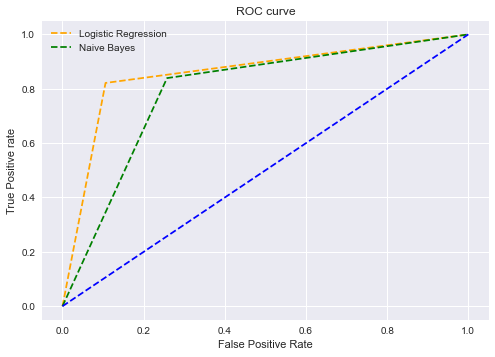

In [75]:
# plot roc curves
plt.plot(lrfpr, lrtpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(nbfpr, nbtpr, linestyle='--',color='green', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();